In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('/content/spam.csv',encoding='latin-1')
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1672,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...,NaN,NaN,NaN
4715,ham,Hey. What happened? U switch off ur cell d who...,NaN,NaN,NaN
3045,ham,So how's the weather over there?,NaN,NaN,NaN
3986,spam,Ringtone Club: Gr8 new polys direct to your mo...,NaN,NaN,NaN


# 1. Data Cleaning

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [46]:
# we will drop last 3 columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [47]:
# we will rename the columns in dataset
data.rename(columns={'v1':"target",'v2':'SMS'},inplace=True)

In [48]:
data.head()

,target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
# As our target Column is in text form then we need to convert it into numbers.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [50]:
data.head()

,target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
# Missing Values Check
data.isnull().sum()

,0
target,0
SMS,0


In [52]:
# Check duplicates
data.duplicated().sum()

np.int64(403)

In [53]:
# As there are duplicates in our dataset then we need to remove them
data.drop_duplicates(keep='first',inplace=True)

In [54]:
data.duplicated().sum()

np.int64(0)

# 2. Exploratory Data Analysis

<Axes: xlabel='target', ylabel='count'>

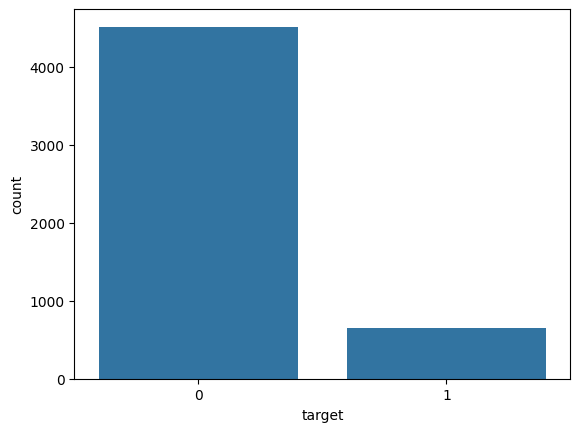

In [55]:
sns.countplot(data=data,x='target')

From above we can say that there is an imbalance in our dataset so we will keeping this point in our mind

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
# Now we create some more features
data['num_char'] = data['SMS'].apply(len)

In [58]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [59]:
# number of words
data['num_word'] = data['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))

In [60]:
#  number of sentence
data['num_sent'] = data['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [61]:
data.head()

,target,SMS,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [62]:
data[['num_char','num_word'	,'num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
data[data['target']==1][['num_char','num_word'	,'num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


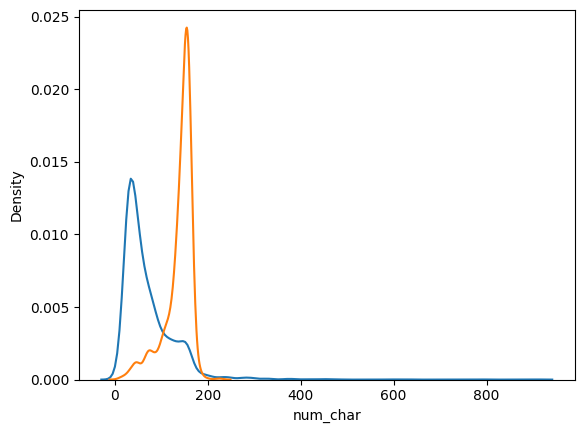

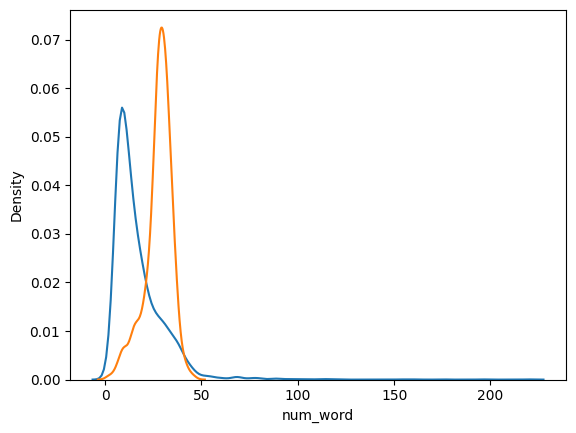

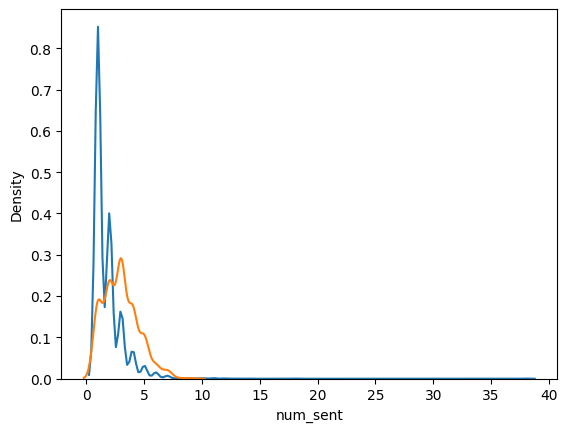

In [64]:
sns.kdeplot(data[data['target']==0]['num_char'])
sns.kdeplot(data[data['target']==1]['num_char'])
plt.show() # Display the first plot

sns.kdeplot(data[data['target']==0]['num_word'])
sns.kdeplot(data[data['target']==1]['num_word'])
plt.show() # Display the second plot

sns.kdeplot(data[data['target']==0]['num_sent'])
sns.kdeplot(data[data['target']==1]['num_sent'])
plt.show() # Display the third plot

From above graph we can conlude that the spam messages have more word, sentence,and character as compared to non spam ones.

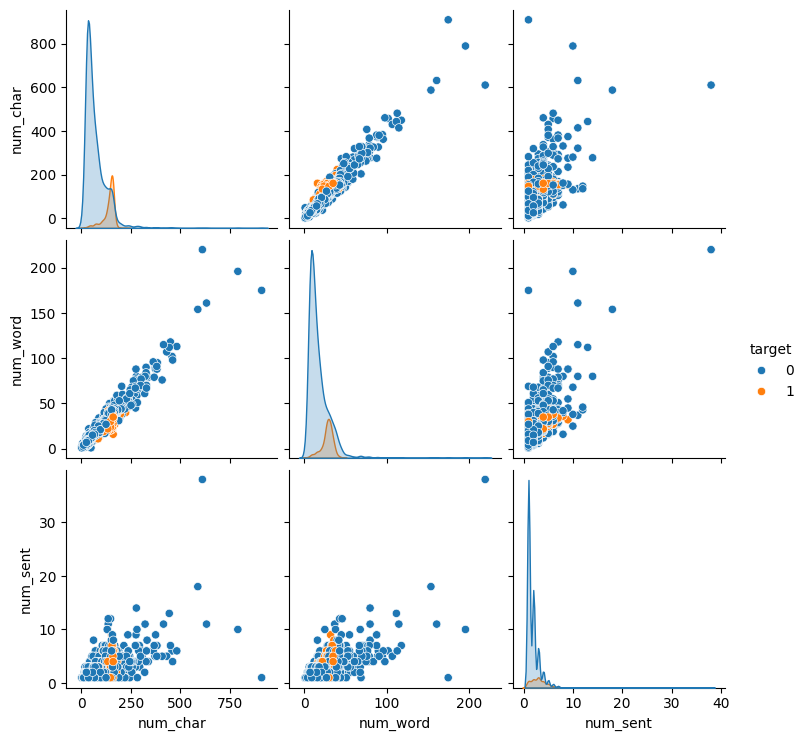

In [65]:
# pairplot
sns.pairplot(data,hue='target')
plt.show()

<Axes: >

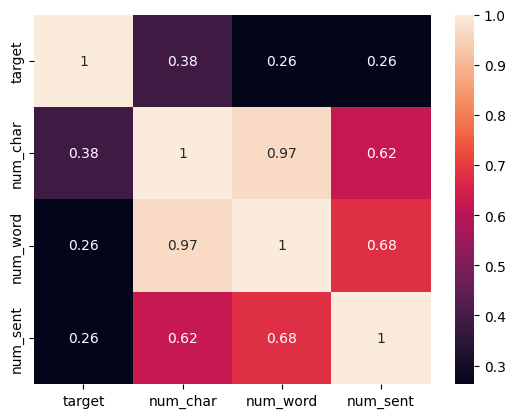

In [66]:
sns.heatmap(data[['target', 'num_char', 'num_word', 'num_sent']].corr(), annot=True)

From above heatmap we can conclude that we can use num_word, num_char, num_sent together as there is a high correlation!!

# 3. Data Preprocessing

In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import string
exclude = string.punctuation

def preprocess(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', exclude))
  words = nltk.word_tokenize(text)
  stopwords_list = stopwords.words('english')
  processed_words = []
  for word in words:
    if word.isalnum() and word not in stopwords_list:
      processed_words.append(ps.stem(word))
  return " ".join(processed_words)

data['SMS'] = data['SMS'].apply(preprocess)
data.head()

,target,SMS,num_char,num_word,num_sent
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah dont think goe usf live around though,61,15,1


Now we will visulaize some words which have more impact for making a SMS spam or not spam.

In [71]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [74]:
spam_wc = wc.generate( data[data['target']==1]['SMS'].str.cat(sep=" "))

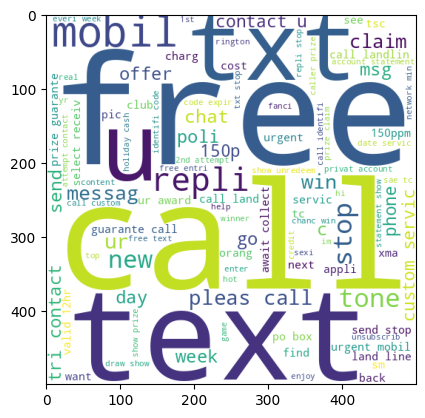

In [75]:
plt.imshow(spam_wc)

In [76]:
not_spam_wc = wc.generate( data[data['target']==0]['SMS'].str.cat(sep=" "))

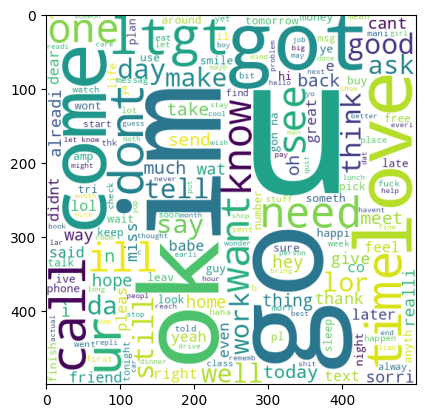

In [77]:
plt.imshow(not_spam_wc)

# 4. Modelling

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(data['SMS']).toarray()

In [79]:
X.shape

(5169, 7959)

In [82]:
y = data['target'].values

In [84]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [86]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.874274661508704
0.5313807531380753
[[777 112]
 [ 18 127]]


In [87]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9729206963249516
0.8926174496644296
[[873  16]
 [ 12 133]]


In [88]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9690522243713733
0.9747899159663865
[[886   3]
 [ 29 116]]


### We Will Try using Tf-Idf Vectorizer

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()

In [90]:
X = tf_idf.fit_transform(data['SMS']).toarray()

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("GaussianNB Metrics:")
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Precision: {precision_score(y_test,y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

GaussianNB Metrics:
Accuracy: 0.8713733075435203
Precision: 0.5254237288135594
Confusion Matrix:
[[777 112]
 [ 21 124]]


In [93]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("MultinomialNB Metrics:")
print(f"Accuracy: {accuracy_score(y_test,y_pred1)}")
print(f"Precision: {precision_score(y_test,y_pred1)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred1)}")

MultinomialNB Metrics:
Accuracy: 0.960348162475822
Precision: 1.0
Confusion Matrix:
[[889   0]
 [ 41 104]]


In [94]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print("BernoulliNB Metrics:")
print(f"Accuracy: {accuracy_score(y_test,y_pred2)}")
print(f"Precision: {precision_score(y_test,y_pred2)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred2)}")

BernoulliNB Metrics:
Accuracy: 0.9690522243713733
Precision: 0.9747899159663865
Confusion Matrix:
[[886   3]
 [ 29 116]]


Trying Out Some more Models

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [96]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [97]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  prc = precision_score(y_test,y_pred)

  return acc,prc

In [98]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,precision_accuracy = train_classifier(clf,X_train,y_train,X_test,y_test)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(precision_accuracy)

In [99]:
performance_data = pd.DataFrame({'Algos':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [100]:
performance_data

,Algos,Accuracy,Precision
1,KN,0.891683,1.000000
2,NB,0.960348,1.000000
5,RF,0.970019,0.991379
10,xgb,0.973888,0.983607
8,ETC,0.970019,0.983051
9,GBDT,0.949710,0.969697
0,SVC,0.973888,0.953846
7,BgC,0.961315,0.894737
4,LR,0.942940,0.883929
3,DT,0.928433,0.831776


Using Max Features as 3000

In [101]:
tf_idf_max = TfidfVectorizer(max_features=3000)
X = tf_idf_max.fit_transform(data['SMS']).toarray()
y = data['target']

In [102]:
X_train_trf,X_test_trf,y_train_trf,y_test_trf = train_test_split(X,y,test_size=0.2,random_state=42)

In [103]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,precision_accuracy = train_classifier(clf,X_train_trf,y_train_trf,X_test_trf,y_test_trf)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(precision_accuracy)

In [104]:
performance_data2 = pd.DataFrame({'Algos':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [105]:
performance_data2

,Algos,Accuracy,Precision
1,KN,0.903288,1.000000
2,NB,0.973888,1.000000
5,RF,0.969052,0.991304
8,ETC,0.979691,0.984375
9,GBDT,0.948743,0.960000
10,xgb,0.967118,0.958678
0,SVC,0.975822,0.947761
7,BgC,0.960348,0.893939
4,LR,0.946809,0.887931
3,DT,0.932302,0.826087


In [109]:
import pickle
pickle.dump(tf_idf_max,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))